In [90]:
import pandas as pd
from os.path import join as path_join
import joblib

import numpy as np


from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedShuffleSplit
from sklearn.svm import SVR

import matplotlib.pyplot as plt

## 1 - get data

In [91]:
DATASETS_PATH = '..\\datasets\\'

In [92]:
raw_df = pd.read_csv(path_join(DATASETS_PATH, 'housing.csv'))

## explore data

In [93]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [94]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [95]:
raw_df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [96]:
raw_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [97]:
%matplotlib inline

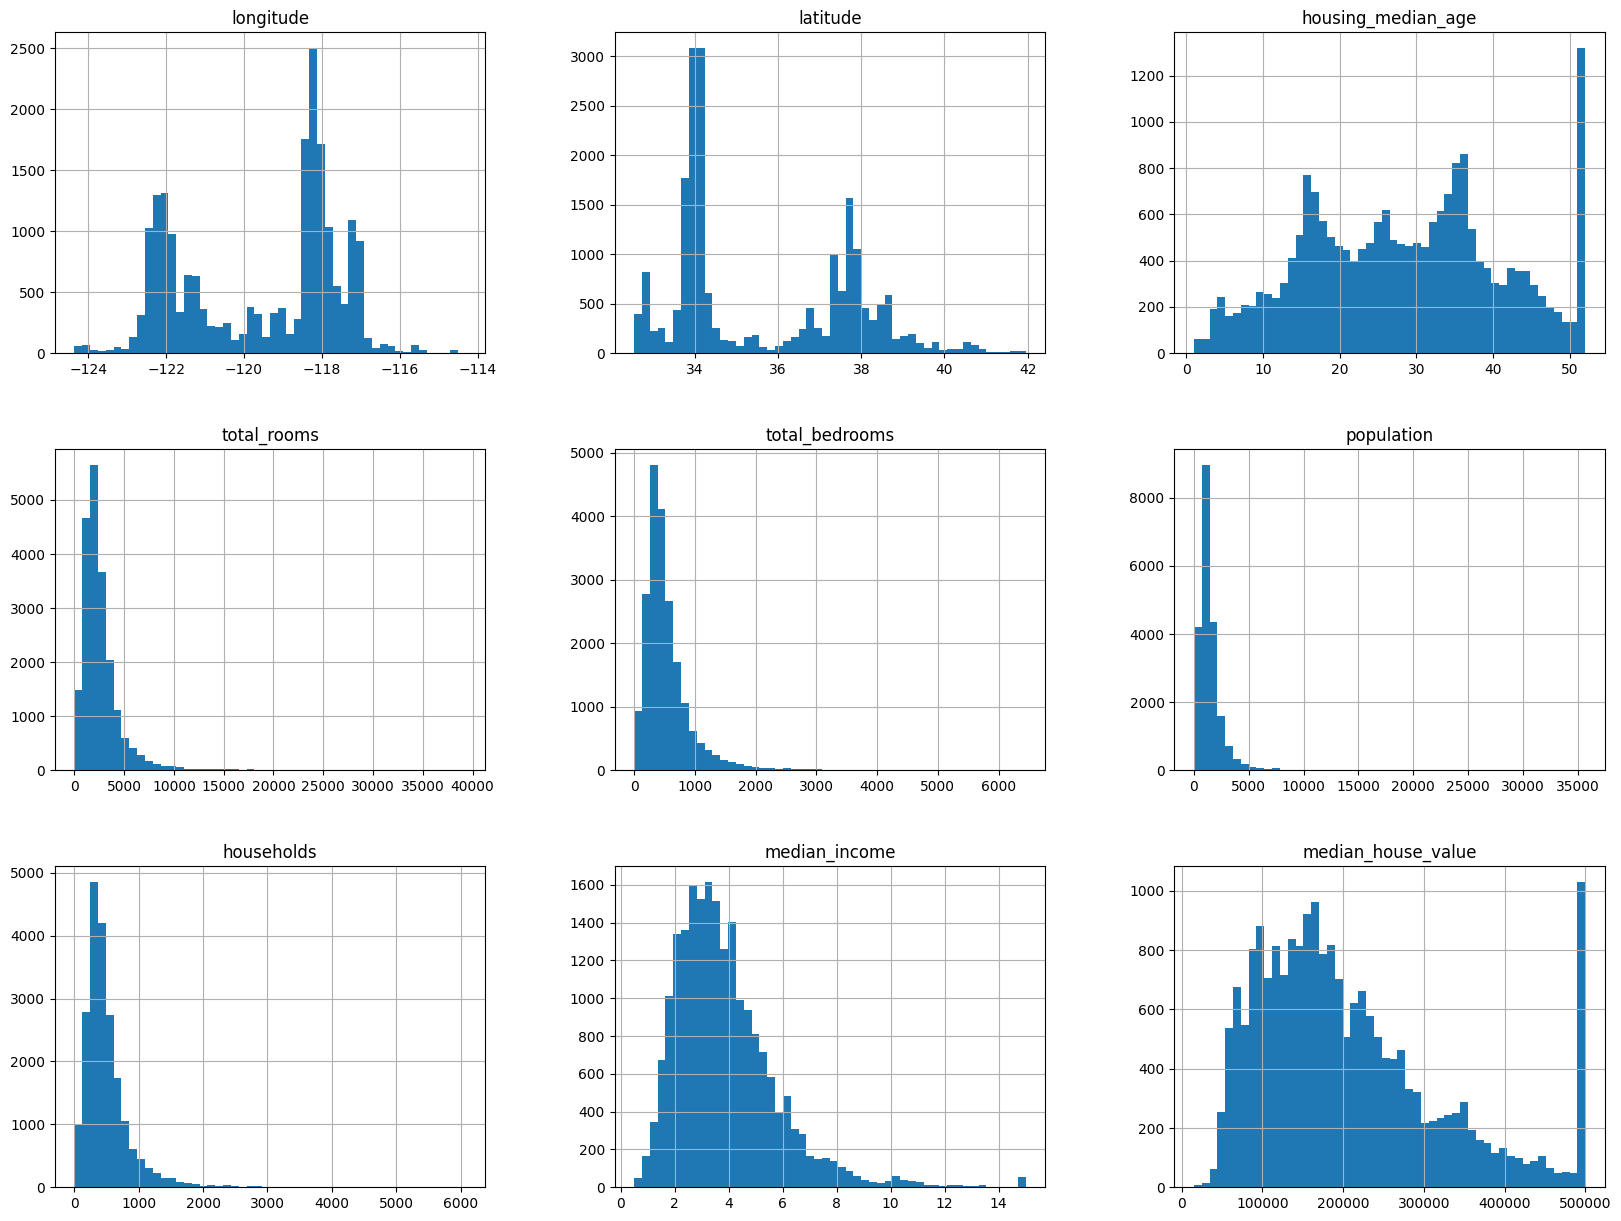

In [98]:
raw_df.hist(bins=50, figsize=(20,15))
plt.show()

Stratified Sampling

In [99]:
raw_df["income_cat"] = pd.cut(raw_df["median_income"],
                                bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                                labels=[1, 2, 3, 4, 5])

<Axes: >

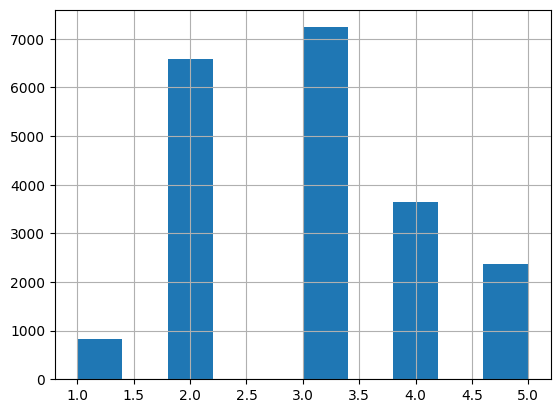

In [100]:
raw_df["income_cat"].hist()

## split

In [101]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(raw_df, raw_df["income_cat"]):
    strat_train_set = raw_df.loc[train_index]
    strat_test_set = raw_df.loc[test_index]

In [102]:
train_set, test_set = train_test_split(raw_df, test_size=0.2, random_state=42)

In [103]:
test_set.to_csv('check_test.csv')

In [104]:
def count_income_cat(data):
    return data['income_cat'].value_counts() / data.shape[0]

In [105]:
pd.DataFrame({'strat_train': count_income_cat(strat_train_set),  
              'random_train': count_income_cat(train_set),
              'strat_test': count_income_cat(strat_test_set),  
              'random_test': count_income_cat(test_set)
              
              
              })

,strat_train,random_train,strat_test,random_test
income_cat,,,,
3,0.350594,0.348595,0.350533,0.358527
2,0.318859,0.317466,0.318798,0.324370
4,0.176296,0.178537,0.176357,0.167393
5,0.114462,0.115673,0.114341,0.109496
1,0.039789,0.039729,0.039971,0.040213


In [106]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis=1)

In [107]:
X_train = strat_train_set.drop(columns='median_house_value')
y_train = strat_train_set['median_house_value']

X_test  = strat_test_set.drop(columns='median_house_value')
y_test  = strat_test_set['median_house_value']

In [114]:
housing = train_set.copy()

## more feature exploring

<Axes: xlabel='longitude', ylabel='latitude'>

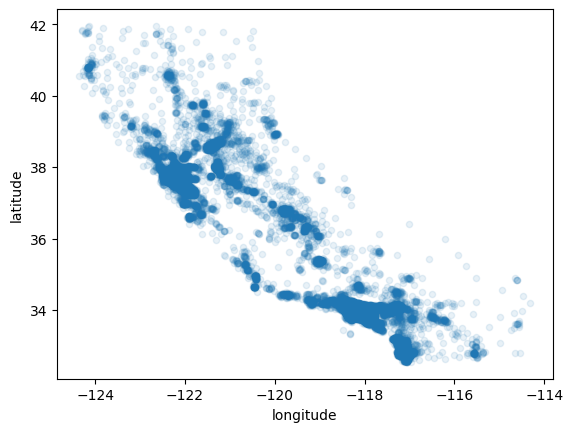

In [115]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

In [116]:
# raw_df

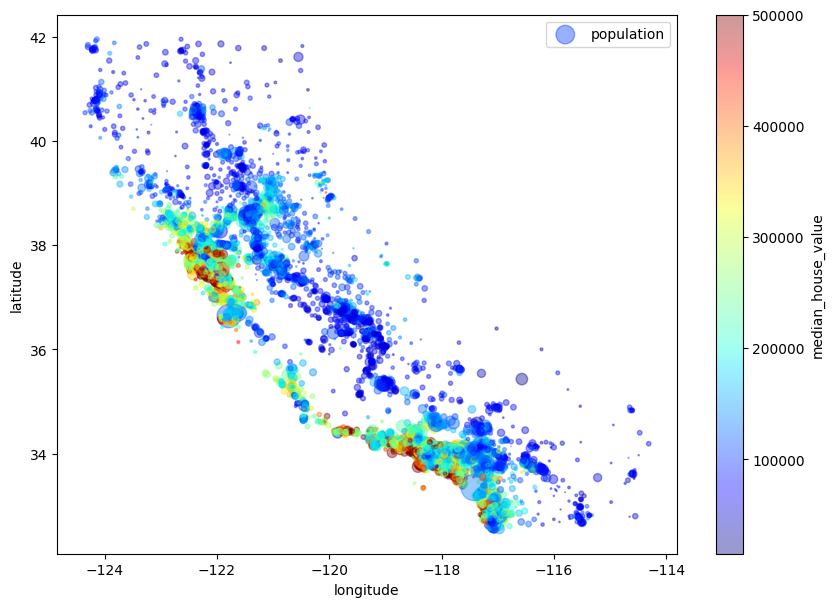

In [117]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
s=housing["population"]/100, label="population", figsize=(10,7),
c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

## correlation 

In [118]:
def check_correlation(df, target_col='median_house_value', text_features=['ocean_proximity']):
    corr_matrix = df.drop(columns=text_features).corr()
    display(corr_matrix[target_col].sort_values(ascending=False))

In [119]:
check_correlation(housing)

median_house_value    1.000000
median_income         0.690647
income_cat            0.646710
total_rooms           0.133989
housing_median_age    0.103706
households            0.063714
total_bedrooms        0.047980
population           -0.026032
longitude            -0.046349
latitude             -0.142983
Name: median_house_value, dtype: float64


note: correlation might be non-linear

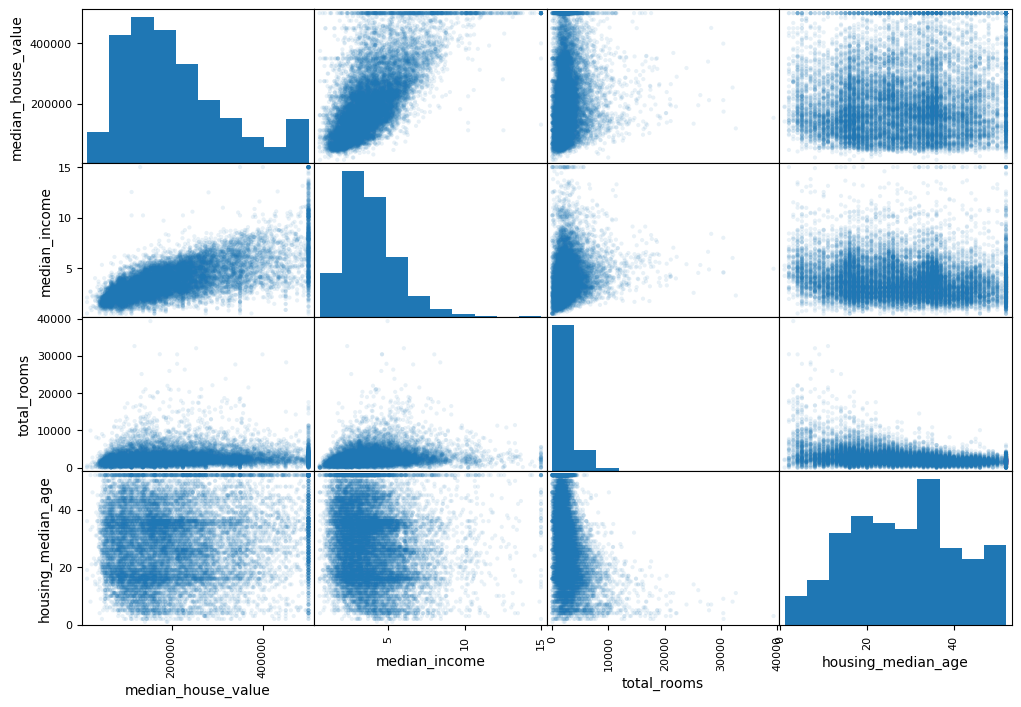

In [120]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8), alpha=0.1)
plt.show()

some of them clasterize well

median_income seems to be the most predictive feature do far

<Axes: xlabel='median_income', ylabel='median_house_value'>

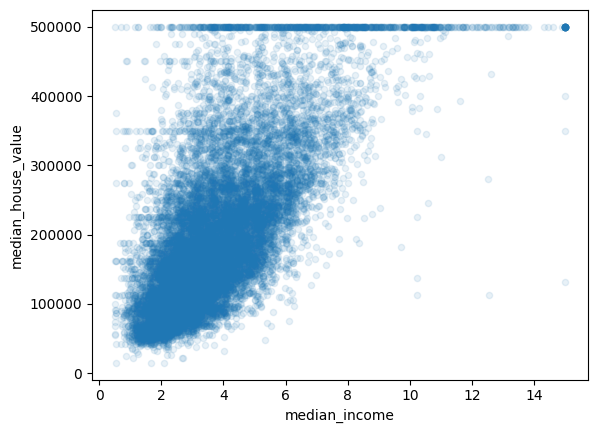

In [121]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

we can many horizontal lines. it tells that values were capped. so it's natural category

## feature engineering

In [122]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [123]:
# # Define the size of each cell
# lat_cell_size = 0.90
# lon_cell_size = 0.90
# 
# # Calculate min and max for latitude and longitude
# min_lat, max_lat = housing['latitude'].min(), housing['latitude'].max()
# min_lon, max_lon = housing['longitude'].min(), housing['longitude'].max()
# 
# # Create the bins for the grid cells
# lat_bins = np.arange(min_lat, max_lat + lat_cell_size, lat_cell_size)
# lon_bins = np.arange(min_lon, max_lon + lon_cell_size, lon_cell_size)
# 
# # Assign each household to a grid cell
# housing['lat_bin'] = np.digitize(housing['latitude'], lat_bins) - 1
# housing['lon_bin'] = np.digitize(housing['longitude'], lon_bins) - 1

# housing['grid_cell'] = housing['lat_bin'].astype(str) + '_' + housing['lon_bin'].astype(str)
# 
# # Convert grid_cell to a categorical feature
# housing['grid_cell'] = housing['grid_cell'].astype('category')

if we'll be able to iteratively update features - it's a good feature. otherwise - no

iteratively means in real time. other implementations might lead to bugs in system.

or if we'll have real density calcucated independently online - this will work. 

in this case it might not be a good feature because we don't know if our dataset is representative enough. 

if we're taking some median value to fill nans or outliers, then we're assuming that train set is representable. Therefore, we can use this feature?

In [124]:
# # Count the number of households in each grid cell
# grid_counts = housing.groupby(['lat_bin', 'lon_bin']).size().reset_index(name='houses_in_cell_90')

# # Merge the counts back to the original DataFrame (if needed)
# housing = housing.merge(grid_counts, on=['lat_bin', 'lon_bin'], how='left')

# grid_counts.head()

In [125]:
# housing['density_90'] = housing['houses_in_cell_90'] / 

In [126]:
check_correlation(housing)

median_house_value          1.000000
median_income               0.690647
income_cat                  0.646710
rooms_per_household         0.158485
total_rooms                 0.133989
housing_median_age          0.103706
households                  0.063714
total_bedrooms              0.047980
population_per_household   -0.022030
population                 -0.026032
longitude                  -0.046349
latitude                   -0.142983
bedrooms_per_room          -0.257419
Name: median_house_value, dtype: float64

In [127]:
# import plotly.graph_objects as go
# 
# fig = go.Figure(
#     data=[go.Histogram(
#         x=housing['housing_median_age'],  # Set the data for the histogram
#         nbinsx=60,  # Set the number of bins (equivalent to 'bins' in Matplotlib)
#         marker_color='royalblue',  # Set the fill color for the histogram bars
#         opacity=0.7,  # Set the opacity (equivalent to 'alpha' in Matplotlib)
#         marker_line_color='black',  # Set the line color for bar edges (equivalent to 'edgecolor' in Matplotlib)
#     )]
# )
# 
# # Customize the layout (optional)
# fig.update_layout(
#     title='Distribution of Housing Median Age',
#     xaxis_title='Housing Median Age (Years)',
#     yaxis_title='Number of Houses'
# )

In [128]:
# quantiles = housing['housing_median_age'].quantile([0.2, 0.4, 0.6, 0.8]).tolist()
# housing['age_quantile_bins'] = pd.cut(housing['housing_median_age'], 
#                                       bins=[0] + quantiles + [housing['housing_median_age'].max()], 
#                                       labels=range(1, len(quantiles)+2)
#                                       )

In [129]:
# bins = [0, 12, 20, 30, 40, housing['housing_median_age'].max()]
# labels = range(1, len(bins))
# housing['age_custom_bins'] = pd.cut(housing['housing_median_age'], bins=bins, labels=labels)

## data cleaning

In [130]:
housing = strat_train_set.drop(columns='median_house_value').copy()
housing_labels = strat_train_set["median_house_value"].copy()

In [131]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [132]:
housing_num = housing.drop("ocean_proximity", axis=1)

Only the total_bedrooms attribute had missing
values, but we cannot be sure that there won’t be any missing values in new data after
the system goes live, so it is safer to apply the imputer to all the numerical attributes:

In [133]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [134]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155,    3.     ])

In [135]:
X = imputer.transform(housing_num)

In [136]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
index=housing_num.index)

## handling cat features

In [137]:
housing_cat = housing[["ocean_proximity"]]

In [138]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

TransformerMixin adds fit_transform

BaseEstimator adds get_params, set_params useful for fine tuning

In [145]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]

        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]

            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [140]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [141]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
 index=housing_num.index)

In [142]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16512 stored elements and shape (16512, 5)>

In [143]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

## PIPELINES features scaling

In [161]:
from sklearn.linear_model import LogisticRegression

In [167]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
         ('imputer', SimpleImputer(strategy="median")),
         ('attribs_adder', CombinedAttributesAdder()),
         ('std_scaler', StandardScaler()),
         # ('what', LogisticRegression()),
     ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [149]:
from sklearn.compose import ColumnTransformer
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
         ("num", num_pipeline, num_attribs),
         ("cat", OneHotEncoder(), cat_attribs),
     ])

housing_prepared = full_pipeline.fit_transform(housing)

## Cross-Validaiton

In [ ]:
# from sklearn.model_selection import cross_val_score
# scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
#               scoring="neg_mean_squared_error", cv=10)
# tree_rmse_scores = np.sqrt(-scores)

## models

In [170]:
from sklearn.ensemble import RandomForestRegressor

In [182]:
from sklearn.model_selection import GridSearchCV
param_grid = [
         {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
         {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
     ]

forest_reg = RandomForestRegressor()

grid_search_rfr = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search_rfr.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [183]:
cvres = grid_search_rfr.cv_results_

for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64464.60615087811 {'max_features': 2, 'n_estimators': 3}
56001.06762244316 {'max_features': 2, 'n_estimators': 10}
53358.56275479367 {'max_features': 2, 'n_estimators': 30}
61182.18805621117 {'max_features': 4, 'n_estimators': 3}
53637.640542966736 {'max_features': 4, 'n_estimators': 10}
51082.64270801431 {'max_features': 4, 'n_estimators': 30}
59691.05708035946 {'max_features': 6, 'n_estimators': 3}
52962.081957359675 {'max_features': 6, 'n_estimators': 10}
50811.51871622446 {'max_features': 6, 'n_estimators': 30}
59578.302178364625 {'max_features': 8, 'n_estimators': 3}
52719.12295329397 {'max_features': 8, 'n_estimators': 10}
50707.864949535346 {'max_features': 8, 'n_estimators': 30}
62933.747237846954 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54800.362335387246 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59664.61051616121 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
53322.38992714005 {'bootstrap': False, 'max_features': 3, 'n_estimator

In [175]:
basic_svr = SVR()

In [176]:
param_grid = [
      {'kernel': ['linear'], 'C': [0.1, 0.5, 0.7, 1.0, 1.5]}  
    , {'kernel': ['rbf'], 'gamma': ['scale', 'auto', 0.5], 'C': [0.1, 0.5, 0.7, 1.0, 1.5]}  
]

In [177]:
grid_search = GridSearchCV(  basic_svr
                           , param_grid
                           , cv=5
                           , scoring='neg_mean_squared_error'
                           , return_train_score=True)

In [180]:
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [0.1, 0.5, 0.7, 1.0, 1.5], 'kernel': ['linear']},
                         {'C': [0.1, 0.5, 0.7, 1.0, 1.5],
                          'gamma': ['scale', 'auto', 0.5], 'kernel': ['rbf']}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [184]:
cvres = grid_search.cv_results_

for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

117799.6176252213 {'C': 0.1, 'kernel': 'linear'}
113524.84246281296 {'C': 0.5, 'kernel': 'linear'}
111628.47676683708 {'C': 0.7, 'kernel': 'linear'}
108954.61231940119 {'C': 1.0, 'kernel': 'linear'}
104947.4819884374 {'C': 1.5, 'kernel': 'linear'}
118894.20443634137 {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
118893.14571300072 {'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}
118930.04557786835 {'C': 0.1, 'gamma': 0.5, 'kernel': 'rbf'}
118727.12506564775 {'C': 0.5, 'gamma': 'scale', 'kernel': 'rbf'}
118723.62020644244 {'C': 0.5, 'gamma': 'auto', 'kernel': 'rbf'}
118894.25944184682 {'C': 0.5, 'gamma': 0.5, 'kernel': 'rbf'}
118657.51797663671 {'C': 0.7, 'gamma': 'scale', 'kernel': 'rbf'}
118651.8997927006 {'C': 0.7, 'gamma': 'auto', 'kernel': 'rbf'}
118877.45698069753 {'C': 0.7, 'gamma': 0.5, 'kernel': 'rbf'}
118543.33233487637 {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
118536.6065676253 {'C': 1.0, 'gamma': 'auto', 'kernel': 'rbf'}
118847.6327571691 {'C': 1.0, 'gamma': 0.5, 'kernel': 'r